In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings("ignore")

from scipy import stats

%matplotlib inline

# Predicting Churn for IBM Subscription Service

**Goals:**
1. Use subscription service data to determine key factors driving churn for *Telco*--a Telecommunications business.
2. Train a machine learning model to be able to predict customer churn for more targeted churn-reduction strategies.

**In this notebook:**
- Descriptive Analysis
- Data Wrangling
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Descriptive Analysis

| Feature Name | Description | Data Type(s) |
| ------------ | ----------- | ------------ |
| gender | male or female | categorical |
| SeniorCitizen | a senior citizen or not (1, 0) | numeric, int |
| Partner | has a partner or not (Yes, No) | categorical |
| Dependents | has dependents or not (Yes, No) | categorical |
| tenure | Number of months the customer has been with Telco | numeric, int |
| PhoneService | has a phone service or not (Yes, No) | categorical |
| MultipleLines | has multiple lines or not (Yes, No, No phone service) | categorical |
| InternetService | ISP (DSL, Fiber optic, No) | categorical |
| OnlineSecurity | has online security or not (Yes, No, No internet service) | categorical |
| OnlineBackup | has online backup or not (Yes, No, No internet service) | categorical |
| DeviceProtection | has device protection or not (Yes, No, No internet service) | categorical |
| TechSupport | has tech support or not (Yes, No, No internet service) | categorical |
| streamingTV | has streaming TV or not (Yes, No, No internet service) | categorical |
| streamingMovies | has streaming movies or not (Yes, No, No internet service) | categorical |
| Contract | contract term (Month-to-month, One year, Two year) | categorical |
| PaperlessBilling | has paperless billing or not (Yes, No) | categorical |
| PaymentMethod | payment method (Electronic check, Mailed check, Bank transfer, Credit card) | categorical |
| MonthlyCharges | amount charged monthly  |  numeric , int |
| TotalCharges | total amount charged | object |
| Churn | churned or not (Yes or No) | categorical |

In [52]:
df = pd.read_csv("../data/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
# Drop useless features
df = df.drop(columns=["customerID"])

# Display feature data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Check Feature Counts

To determine if there are any ordinal features, I examine the number of unique values for each feature. If that number is greater than 1% of the number of rows in the subscription churn dataset, I will consider that feature continuous, otherwise it might be ordinal meaning that it can be represented as a categorical variable. This not only saves on memory usage and processing speeds, but also enables support for more advanced analysis algorithms.

In [54]:
# Display feature counts and convert ordinal features
MAX_CATEGORIES = df.shape[0] / 100

for feature in df:
    num_unique = len(df[feature].unique())
    print(feature.ljust(20), num_unique)

    # Cast ordinal features as 'category' data type
    if num_unique < MAX_CATEGORIES:
        df[feature] = df[feature].astype('category')

gender               2
SeniorCitizen        2
Partner              2
Dependents           2
tenure               73
PhoneService         2
MultipleLines        3
InternetService      3
OnlineSecurity       3
OnlineBackup         3
DeviceProtection     3
TechSupport          3
StreamingTV          3
StreamingMovies      3
Contract             3
PaperlessBilling     2
PaymentMethod        4
MonthlyCharges       1585
TotalCharges         6531
Churn                2


#### Missing values

In [55]:
# Check for null values on numerical data types
cat_cols = set(df.columns) - set(df._get_numeric_data().columns)
for feature in cat_cols:
    num_nulls = df[feature].apply(lambda x: len(x.strip()) == 0 or x.strip().lower() == 'nan').sum()
    print(feature.ljust(20), num_nulls)

StreamingTV          0
OnlineBackup         0
Contract             0
Dependents           0
InternetService      0
MultipleLines        0
PaperlessBilling     0
PhoneService         0
TechSupport          0
PaymentMethod        0
StreamingMovies      0
DeviceProtection     0


AttributeError: 'int' object has no attribute 'strip'

In [56]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Display rows with missing TotalCharges values
totalcharges_null_indices = df[df['TotalCharges'].isna()].index
display(df.iloc[totalcharges_null_indices])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It appears that the rows with missing **TotalCharges** values also have a **tenure** of *0 months*.
Based on the fact that the **TotalCharges** column should add up all the charges of a customer over their **tenure**, we can derive the formula for **TotalCharges** as follows: 

$$\text{TotalCharges} = \text{MonthlyCharges} * \text{tenure} $$

When **tenure** is *0 months*, we therefore know that **TotalCharges** should be *$0.00*. We'll use this formula to handle these rows using value [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)).

In [57]:
# Impute missing values
df['TotalCharges'] = df['TotalCharges'].fillna(0)

#### Binning Numerical Features

The 3 numerical features we're left with are: **tenure**, **MonthlyCharges** and **TotalCharges**.
We'll use a binning technique to encode these features into ordinal features as well!
For interpretation, we'll use the same 3 bins for each numerical feature: **Low**, **Medium**, **High**

Since binning is a lossy procedure, we will keep the original numerical features for statistical analysis purposes.

-- Binning tenure feature --
Low                  0.00 - 24.00
Medium               24.00 - 48.00
High                 48.00 - 72.00
-- Binning MonthlyCharges feature --
Low                  18.25 - 51.75
Medium               51.75 - 85.25
High                 85.25 - 118.75
-- Binning TotalCharges feature --
Low                  0.00 - 2894.93
Medium               2894.93 - 5789.87
High                 5789.87 - 8684.80


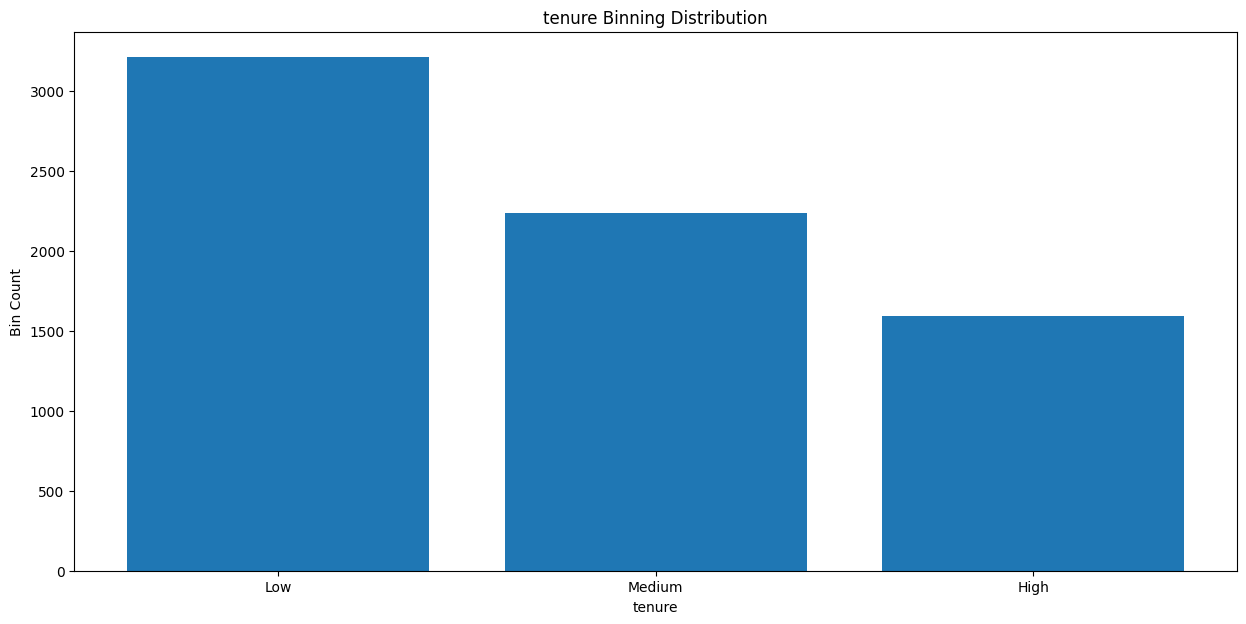

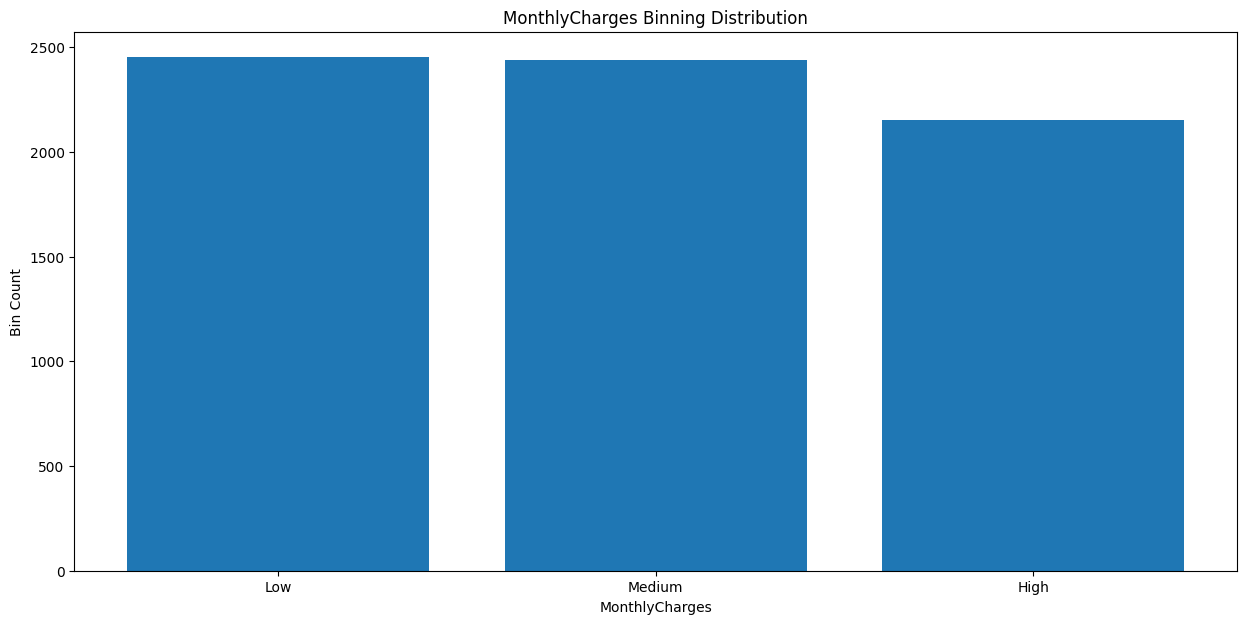

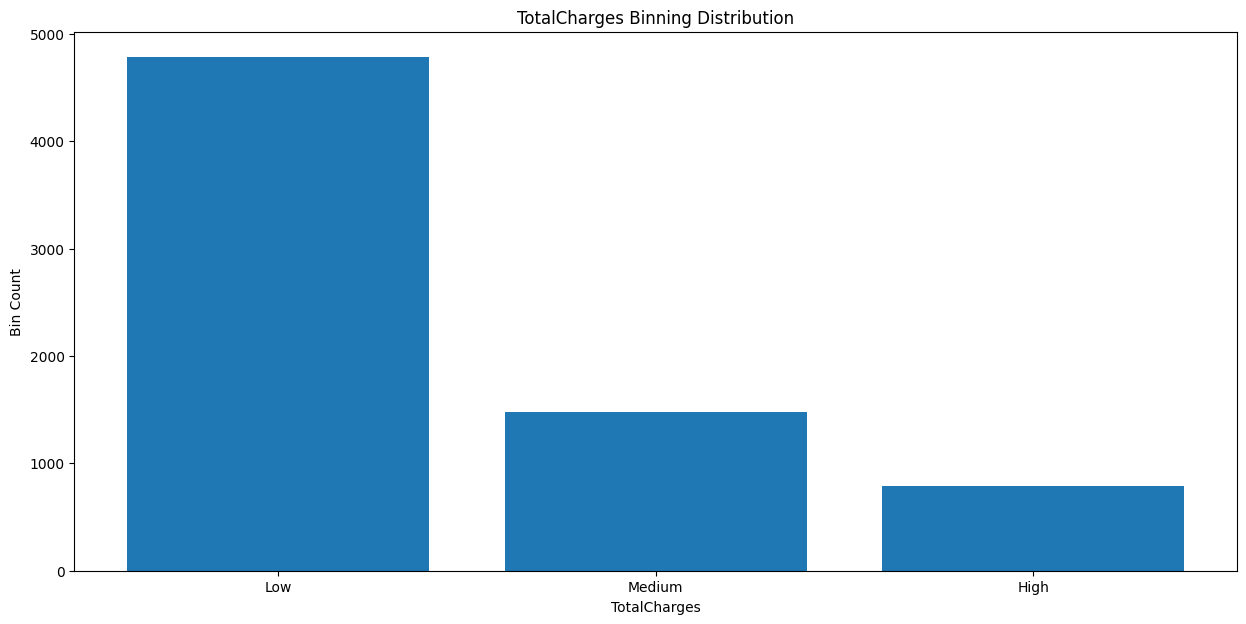

In [58]:
# Encode numerical features into bins by value (i.e. 'Low', 'Medium' and 'High')
BINS = 3
bin_names = ['Low', 'Medium', 'High']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    print(f"-- Binning {feature} feature --")

    # Segment feature values into 3 bins
    bins = np.linspace(min(df[feature]), max(df[feature]), BINS+1)

    # Print encoding scheme
    for i in range(1, len(bins)): 
        print(bin_names[i-1].ljust(20), f"{bins[i-1]:.2f} - {bins[i]:.2f}")
    
    # Add new column with binned values
    new_col = f'{feature}_binned'
    df.insert(df.shape[1]-1, new_col, pd.cut(df[feature], bins, labels=bin_names, include_lowest=True))

    # Plot bin distribution for feature
    plt.figure(figsize=(15,7))
    plt.bar(bin_names, df[new_col].value_counts())
    plt.xlabel(feature)
    plt.ylabel('Bin Count')
    plt.title(f"{feature} Binning Distribution")

# Uncomment the next line if you just want the cleaned dataset
# df = df.drop(columns=numerical_features)

In [59]:
# Print details for fully-categorical DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 7043 non-null   category
 1   SeniorCitizen          7043 non-null   category
 2   Partner                7043 non-null   category
 3   Dependents             7043 non-null   category
 4   tenure                 7043 non-null   int64   
 5   PhoneService           7043 non-null   category
 6   MultipleLines          7043 non-null   category
 7   InternetService        7043 non-null   category
 8   OnlineSecurity         7043 non-null   category
 9   OnlineBackup           7043 non-null   category
 10  DeviceProtection       7043 non-null   category
 11  TechSupport            7043 non-null   category
 12  StreamingTV            7043 non-null   category
 13  StreamingMovies        7043 non-null   category
 14  Contract               7043 non-null   c

In [61]:
# Save DataFrame to Pickle file
df.to_pickle("../data/telco_customer_churn_eda.pkl")

### Univariate Analysis



In [2]:
from scipy.stats import normaltest
df = pd.read_pickle("../data/telco_customer_churn_eda.pkl")

#### Normality Testing on Numerical Features

One important check in univariate analysis is determining whether a numerical feature is normally distribute or not. We can use Normality Tests such as the [D'Agostino K-Squared Test](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test) to measure the departure of a given feature from a normal distribution.

<br/>

**D'Agostino / Pearson K-Squared Test**

Here we use the `scipy` library's `normaltest` function which implements the D'Agostino K-Squared test checking whether, for a given feature, a sample differs from a normal distribution. The output is a statistic and chi-squared probability for the hypothesis test. The **null hypothesis** is that a sample comes from a normal distribution.

$$\text{D'Agostino Score} = s^2 + k^2 \quad \text{ where } s \text{ is the skew z-score, and } k \text{ is the kurtosis z-score}$$

$$\text{skew z-score} = s = \text{skew } / \text{ std err} = \frac{\sum{(X_i - \bar X)^3}}{(N - 1)\sigma^3} / \sqrt{\frac{6n(n-1)}{(n-2)(n-1)(n+3)}}$$

$$\text{kurtosis z-score} = k = \text{kurtosis } / \text{ std err} = \frac{\sum{(X_i - \bar X)^4}}{(N - 1)\sigma^4} / 2(n-1)\sqrt{\frac{6n}{(n-2)(n-3)(n+3)(n+5)}}$$

In [3]:
# Copied from above for accessibility
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Execute D'Agostino K^2 test on all numerical features
alpha = 5e-2
for feature in numerical_features:
    score, p = normaltest(df[feature])

    # Print score
    print(feature.ljust(20), f"score={score:.2f}\tp={p:.2f}\t", end="\t")

    if p > alpha:
        print("Gaussian-like (H0)")
    else:
        print("Not Gaussian-like (reject H0)")

tenure               score=76258.51	p=0.00		Not Gaussian-like (reject H0)
MonthlyCharges       score=11419.53	p=0.00		Not Gaussian-like (reject H0)
TotalCharges         score=808.60	p=0.00		Not Gaussian-like (reject H0)


For all numerical features, the D'Agostino K-Squared Test rejects the null hypothesis, which means that the data for these features is **not normally distributed**. This tells us that our data might have outliers or be skewed and that data transformations on these features should be performed before applying regression techniques.

**Box Plots for Numerical Features**

It appears that while `tenure`, `TotalCharges` and `MonthlyCharges` are not normally distributed, `TotalCharges` is the only feature with a heavy skew toward "Low" values (less than *$2894.93*). Since `MonthlyCharges` is more uniformally distributed, we should expect the skew in `TotalCharges` to be generated by a similar skew in `tenure`. While the histogram for the binned `tenure` feature confirms this, the median value of the `tenure` box plot below is quite neutral at *30 months*. Given the formula for the `TotalCharges` feature, this suggests that there may be a small correlation between a long-time subscribers (high `tenure`) and lower monthly subscription costs (low `MonthlyCharges`).

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(15,7))
    df.boxplot(column=feature)
    plt.title(f"Box Plot for {feature}")

#### Visualizing Categorical Distributions

In [6]:
# Churn distribution
churn_dist = df['Churn'].value_counts().reset_index()
fig = px.pie(churn_dist, values="count", names="Churn", title="Churn Distribution")
fig.update_traces(textposition='inside', textinfo="percent+label")
fig.update_layout(height=512, width=512)
fig.show()

In [ ]:
# Plot remaining categorical features
categorical_features = set(df.columns) - set(numerical_features)
for feature in categorical_features:
    feat_dist = df[feature].value_counts().reset_index()
    fig = px.pie(feat_dist, values="count", names=feature, title=f"{feature} Distribution")
    fig.update_traces(textposition='inside', textinfo="percent+label")
    fig.update_layout(height=512, width=512)
    fig.show()
    fig.write_image(f"../images/{feature.lower()}_dist.png")

### Bivariate Analysis

In [11]:
from scipy.stats import kendalltau, chi2_contingency, chi2
from itertools import permutations
df = pd.read_pickle("../data/telco_customer_churn_eda.pkl")

#### Detecting Correlation between Ordinal Features

In the Univariate Analysis section, I found that `TotalCharges` could be dependent on `tenure` and also that lower values for `MonthlyCharges` might be found in higher proportions with higher values for `tenure`. We can use the [Kendall Rank Correlation Coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) test to examine these hypotheses further.

The **Kendall $\tau$ Coefficient** is defined as:

$$\tau = \frac{\text{(\# of concordant pairs)} - \text{(\# of discordant pairs)}}{\text{(\# of pairs)}}$$

$$-1 \leq \tau \leq 1 $$

In [10]:


alpha = 5e-2
for feature, num_feature in permutations(numerical_features, 2):
    ordinal_feature = feature + '_binned'
    tau, p = kendalltau(df[ordinal_feature], df[num_feature])
    correlation_status = 'Correlated' if p <= alpha else 'Uncorrelated'
    print(f"{ordinal_feature} w/ {num_feature}".ljust(48), f"tau={tau:.2f}\tp={p:.2f}\t{correlation_status}")

tenure_binned w/ MonthlyCharges                  tau=-0.11	p=0.00	Correlated
tenure_binned w/ TotalCharges                    tau=-0.24	p=0.00	Correlated
MonthlyCharges_binned w/ tenure                  tau=-0.16	p=0.00	Correlated
MonthlyCharges_binned w/ TotalCharges            tau=-0.21	p=0.00	Correlated
TotalCharges_binned w/ tenure                    tau=0.07	p=0.00	Correlated
TotalCharges_binned w/ MonthlyCharges            tau=0.00	p=0.75	Uncorrelated


#### Detecting Dependence of Categorical Features

The importance of a feature in a machine learning model can be measured by how well that feature discriminates between target classes.
In our case, we only want those features with the ability to discriminate between customers who churn and those who keep their subscriptions.

We can test whether a categorical feature will add to the machine learning model's ability to discriminate on the target feature by examining the results of a [Pearson's Chi-Squared test](https://en.wikipedia.org/wiki/Chi-squared_test).

$$\Chi^2 = \sum^{k}_{i}{\frac{(x_i - m_i)^2}{m_i}} \quad \text{ where } k \text{ is the number of classes}$$


In [13]:
target = df['Churn']

# Significance (1 - Probability of Larger Value than Chi^2)
alpha = 5e-2

for feature in df.columns:
    # Create frequency table
    freq = pd.crosstab(df[feature], target)

    # Run Chi-Squared Test
    chi, p, degrees, expected = chi2_contingency(freq, correction=True)

    crit = chi2.ppf(1-alpha, degrees)
    test_status = 'Dependent' if (abs(chi) >= crit or p <= alpha) else 'Independent'

    print(f"{feature} w/ Churn\n", f"p={p:.2f}\t\tdof={degrees}\n", f"score={chi:.2f}\tcrit={crit:.2f}\tprob={1-alpha:.2f}\nResult:\t{test_status}\n")

gender w/ Churn
 p=0.49		dof=1
 score=0.48	crit=3.84	prob=0.95
Result:	Independent

SeniorCitizen w/ Churn
 p=0.00		dof=1
 score=159.43	crit=3.84	prob=0.95
Result:	Dependent

Partner w/ Churn
 p=0.00		dof=1
 score=158.73	crit=3.84	prob=0.95
Result:	Dependent

Dependents w/ Churn
 p=0.00		dof=1
 score=189.13	crit=3.84	prob=0.95
Result:	Dependent

tenure w/ Churn
 p=0.00		dof=72
 score=1065.33	crit=92.81	prob=0.95
Result:	Dependent

PhoneService w/ Churn
 p=0.34		dof=1
 score=0.92	crit=3.84	prob=0.95
Result:	Independent

MultipleLines w/ Churn
 p=0.00		dof=2
 score=11.33	crit=5.99	prob=0.95
Result:	Dependent

InternetService w/ Churn
 p=0.00		dof=2
 score=732.31	crit=5.99	prob=0.95
Result:	Dependent

OnlineSecurity w/ Churn
 p=0.00		dof=2
 score=850.00	crit=5.99	prob=0.95
Result:	Dependent

OnlineBackup w/ Churn
 p=0.00		dof=2
 score=601.81	crit=5.99	prob=0.95
Result:	Dependent

DeviceProtection w/ Churn
 p=0.00		dof=2
 score=558.42	crit=5.99	prob=0.95
Result:	Dependent

TechSupport w/ C

There are 3 categorical features that appear to not discriminate the target feature well: `TotalCharges`, `PhoneService`, and `gender`.

### Multivariate Analysis

In [14]:
df = pd.read_pickle("../data/telco_customer_churn_eda.pkl")

In [27]:
def get_frequency_distribution(features, target_feature="Churn"):
    plt.figure(figsize = (20,5))
    subdf = [df[f] for f in features]
    freq = pd.crosstab(index=subdf, columns=df[target_feature], normalize = "index")
    freq.rename({"Yes": f"P({target_feature})", "No": f"P(Not {target_feature})"}, axis=1, inplace=True)
    freq.plot.bar(color = ["blue", "red"])

    features_str = ", ".join(features)
    plt.xlabel(features_str)
    plt.ylabel("Probability")
    plt.title(f"Frequency Distribution for {features_str}")
    plt.legend()
    return plt.show()

<Figure size 2000x500 with 0 Axes>

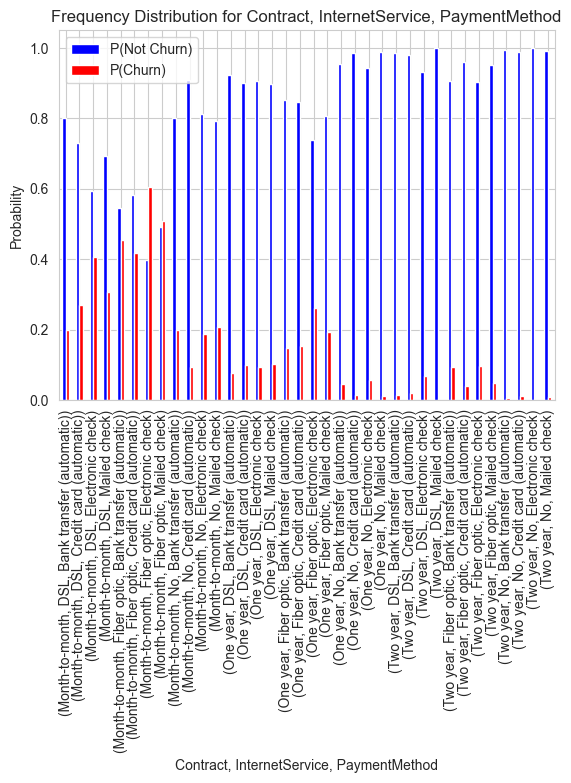

In [28]:
get_frequency_distribution(['Contract', 'InternetService', 'PaymentMethod'])

In [ ]:
# (Future)